# Unit 5 - Financial Planning (Gregory Terrinoni)
*The below code utilizes various APIs to calculate the value of a theoretical retirement portfolio and run various simulations to determine various retirement timeframes*

In [1]:
# Initial imports
import os
import pprint
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
btc_value = btc_price * my_btc
eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $14046.55
The current value of your 5.3 ETH is $2017.02


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
my_portfolio

AGG                                       SPY  \
                            open    high      low   close   volume    open   
2020-10-14 00:00:00-04:00  118.1  118.11  117.985  118.04  3292758  350.75   

                                                             
                             high     low   close    volume  
2020-10-14 00:00:00-04:00  351.93  347.14  347.97  47156216

In [9]:
# Pick AGG and SPY close prices
spy_close_price = my_portfolio.iloc[0,8]
agg_close_price = my_portfolio.iloc[0,3]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(columns= ["amount"], index= ['crypto', 'shares'])
df_savings.loc['crypto'] = [btc_value + eth_value] 
df_savings.loc['shares'] = [my_spy_value + my_agg_value]

# Display savings DataFrame
display(df_savings)

,amount
crypto,16063.6
shares,41006.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE4959AA88>],
      dtype=object)

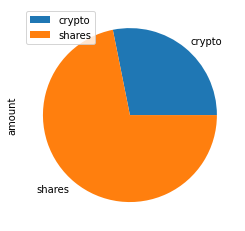

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = ((btc_value + eth_value) + (my_spy_value + my_agg_value))

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! Your savings of ${total_savings} is enough for an emergency fund!')
elif total_savings == emergency_fund:
    print(f'Congratulations! You have reached your finanacial goal of ${emergency_fund}!')
else:
    print(f'Keep going! You are only ${emergency_fund - total_savings} away from your goal!')

Congratulations! Your savings of $57070.073 is enough for an emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
monte_carlo_pfo = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
monte_carlo_pfo.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = monte_carlo_pfo,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005225,1.011278,1.007423,1.005072,1.014322,0.999072,1.017263,0.983007,0.999401,0.997694,...,1.000624,1.000630,1.008237,1.002364,1.006519,1.002164,0.999826,0.994026,1.000485,1.013928
2,1.013655,1.011134,1.024910,1.009374,1.009771,1.008232,1.026676,0.988350,0.991440,0.995349,...,1.002472,1.003021,1.015551,1.004405,0.996933,0.999056,0.991819,0.999492,1.002566,1.027541
3,1.007865,1.010176,1.015218,1.018718,1.010900,1.016765,1.028128,0.984565,0.990349,1.001302,...,1.011414,0.993347,1.019050,1.018346,0.982939,0.998910,0.985081,1.014647,0.989242,1.019984
4,0.999348,1.021608,1.020976,1.015323,1.007866,1.014002,1.032411,0.970044,0.970184,1.006726,...,1.007502,0.985586,1.023541,1.014303,0.997567,1.005706,0.983999,1.012723,0.981844,1.030217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.283232,2.491096,16.079750,13.180932,10.432248,4.853226,4.672624,12.983027,3.545988,8.175228,...,8.406805,4.779610,12.511906,14.950014,4.593977,4.699872,15.033578,17.324550,5.449612,2.591050
7557,10.210551,2.476841,15.977141,13.138648,10.356226,4.855251,4.641675,13.069655,3.577403,8.213052,...,8.368421,4.789631,12.373021,14.883158,4.572424,4.694860,15.252018,17.155881,5.467750,2.589693
7558,10.294750,2.446392,15.872437,13.277279,10.406162,4.879053,4.612464,12.983840,3.596850,8.243658,...,8.384859,4.749207,12.350081,14.891920,4.596428,4.715292,15.322644,17.247096,5.451313,2.599724
7559,10.294281,2.466108,15.845096,13.061068,10.279556,4.867756,4.607599,12.949277,3.537468,8.298187,...,8.371402,4.751694,12.466194,14.858744,4.573421,4.745094,15.253064,17.166522,5.416618,2.596448


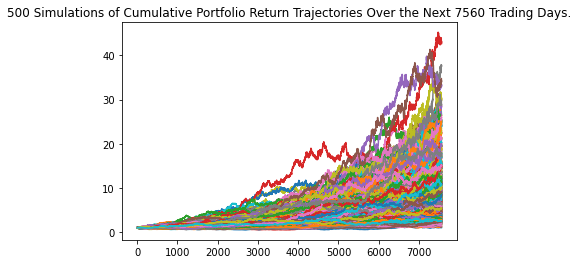

In [19]:
# Plot simulation outcomes
monte_carlo_plot = MC_thirty_year.plot_simulation()
monte_carlo_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches = "tight")

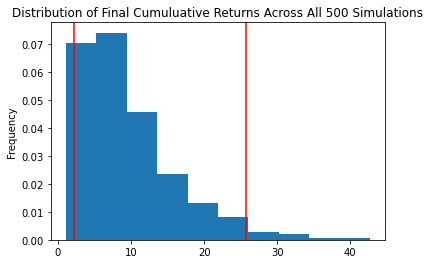

In [20]:
# Plot probability distribution and confidence intervals
MC_dist_plot = MC_thirty_year.plot_distribution()
MC_dist_plot.get_figure().savefig("MC_thirty_year_dist_plot.png", bbox_inches="tight")

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_table = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_table)

count           500.000000
mean              9.572328
std               6.459044
min               1.080594
25%               4.756087
50%               7.941218
75%              12.302263
max              42.707699
95% CI Lower      2.167537
95% CI Upper     25.764710
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_summary_table[8] * initial_investment, 2)
ci_upper = round(MC_summary_table[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43350.73 and $515294.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_summary_table[8] * initial_investment, 2)
ci_upper = round(MC_summary_table[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65026.1 and $772941.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = monte_carlo_pfo,
    weights = [.15,.85],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015487,0.984314,0.998895,0.995284,1.006688,0.998503,0.998602,1.007335,1.023794,1.010809,...,0.988767,0.994183,1.014144,1.003815,1.002075,1.016659,1.011723,1.006140,1.010094,0.995929
2,0.999479,0.982396,0.993559,0.986711,1.000753,0.989664,0.993560,0.988169,1.018523,1.016745,...,0.990612,1.006093,0.999642,0.995746,0.999757,1.026767,1.019519,1.015407,1.019315,0.986353
3,0.996884,0.967591,0.992645,0.976772,0.999484,1.013896,1.018908,0.984738,1.024772,1.009265,...,0.998139,1.003649,0.992771,0.997975,0.994813,1.033906,1.021415,0.992578,1.012867,0.995668
4,1.002111,0.971401,0.979425,0.982770,0.994604,1.015945,1.023183,0.975420,1.018914,1.002355,...,0.997222,0.999470,0.991660,1.003208,1.008859,1.023547,1.001850,0.989096,1.024142,0.994085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.960203,2.010897,1.338445,2.275361,1.009549,1.739715,2.768256,2.672838,1.906771,1.689528,...,1.867514,2.232909,0.820468,1.157735,0.991411,3.124761,1.289570,2.058610,1.473583,1.372545
1257,0.959474,2.023222,1.334087,2.308394,1.016269,1.721007,2.734770,2.661873,1.872199,1.702057,...,1.832561,2.185980,0.802097,1.140576,1.001529,3.144247,1.294905,2.129313,1.465493,1.386081
1258,0.978020,2.014516,1.357171,2.297245,1.022826,1.706235,2.711164,2.608627,1.865627,1.697095,...,1.808081,2.168659,0.809165,1.144693,1.002994,3.147090,1.301912,2.150555,1.456952,1.386670
1259,0.964262,1.964561,1.372142,2.313594,1.035688,1.738991,2.680106,2.606523,1.880261,1.690586,...,1.814810,2.152922,0.817389,1.137527,0.991846,3.159419,1.295238,2.160408,1.460834,1.383661


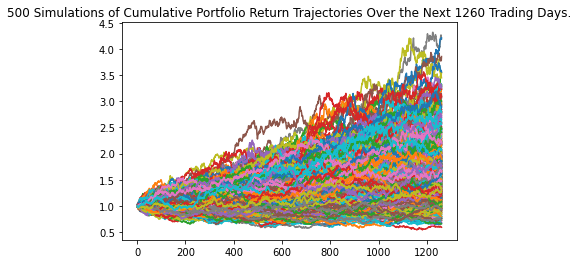

In [28]:
# Plot simulation outcomes
monte_carlo_aggressive = MC_five_year.plot_simulation()
monte_carlo_aggressive.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches = "tight")

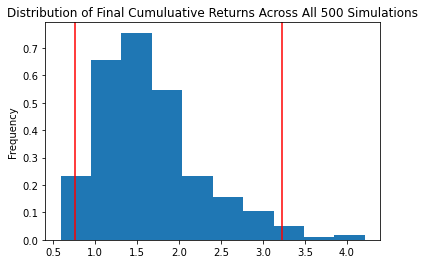

In [29]:
# Plot probability distribution and confidence intervals
MC_dist_aggressive = MC_five_year.plot_distribution()
MC_dist_aggressive.get_figure().savefig("MC_five_year_dist_plot.png", bbox_inches="tight")

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_aggressive_table = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(MC_aggressive_table)

count           500.000000
mean              1.653599
std               0.606133
min               0.590063
25%               1.229239
50%               1.534996
75%               1.938923
max               4.213764
95% CI Lower      0.764305
95% CI Upper      3.230344
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_aggressive_table[8] * initial_investment, 2)
ci_upper_five = round(MC_aggressive_table[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15286.1 and $64606.88


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = monte_carlo_pfo,
    weights = [.15,.85],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012997,0.988254,1.002157,1.013678,0.990421,1.011036,0.993238,0.998063,1.020724,1.010782,...,1.015023,1.004585,1.007130,1.004899,1.003280,1.007033,0.995767,0.995058,0.991151,0.999746
2,1.021632,0.980238,0.991730,1.015888,0.993068,1.020314,0.986186,1.008683,1.025450,1.012372,...,1.014637,1.007529,0.998736,1.005290,1.000066,1.008810,1.005044,1.000257,0.987163,0.983828
3,1.016922,0.966281,0.992104,1.003723,0.976550,1.018651,0.985545,1.008119,1.027158,1.007557,...,1.003919,1.003473,1.003722,1.005788,0.993977,1.009050,1.015146,1.012936,0.980580,0.981095
4,0.992238,0.976171,0.999453,0.992975,0.970125,1.009795,0.992452,1.008478,1.033008,0.999619,...,1.011027,0.997735,1.007031,0.995090,0.989054,1.005938,1.031765,1.026572,0.973750,0.994812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.202499,1.138413,3.898393,4.142377,2.054324,8.551587,3.456136,6.981765,0.897175,3.369525,...,2.244503,5.741097,2.410272,2.883811,1.488772,3.545650,3.684617,3.504637,3.102405,0.934072
2517,2.183057,1.139237,3.951648,4.166867,2.070571,8.532172,3.415888,7.007196,0.890004,3.369055,...,2.229341,5.792579,2.451987,2.909275,1.473427,3.549951,3.753156,3.502935,3.120901,0.936819
2518,2.202438,1.145732,3.928667,4.167240,2.081561,8.617904,3.427400,6.997565,0.917725,3.303209,...,2.262487,5.782001,2.407483,2.905152,1.451737,3.581066,3.771973,3.524491,3.095235,0.949543
2519,2.171742,1.152876,3.911429,4.234819,2.089965,8.452530,3.418394,6.976129,0.907456,3.269112,...,2.257346,5.743867,2.388248,2.879444,1.434175,3.645985,3.785083,3.485591,3.037830,0.933339


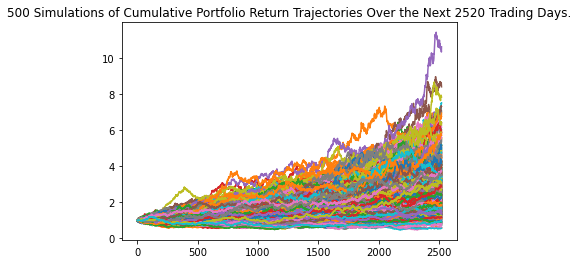

In [31]:
# Plot simulation outcomes
monte_carlo_aggressive_ten = MC_ten_year.plot_simulation()
monte_carlo_aggressive_ten.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches = "tight")

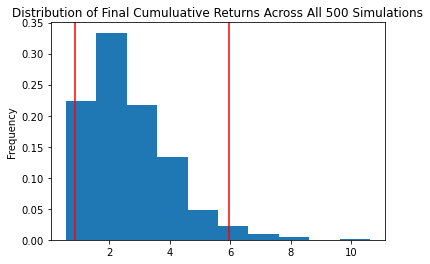

In [32]:
# Plot probability distribution and confidence intervals
MC_dist_aggressive_ten = MC_ten_year.plot_distribution()
MC_dist_aggressive_ten.get_figure().savefig("MC_ten_year_dist_plot.png", bbox_inches="tight")

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_aggressive_ten_table = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(MC_aggressive_ten_table)

count           500.000000
mean              2.657998
std               1.375554
min               0.559061
25%               1.632473
50%               2.368006
75%               3.467723
max              10.627791
95% CI Lower      0.866706
95% CI Upper      5.954415
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_aggressive_ten_table[8] * initial_investment, 2)
ci_upper_ten = round(MC_aggressive_ten_table[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $17334.11 and $119088.31
